In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [48]:
import itertools

In [1]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt'
data = pd.read_csv(url, sep=" ", header=None)

In [2]:
print(data.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


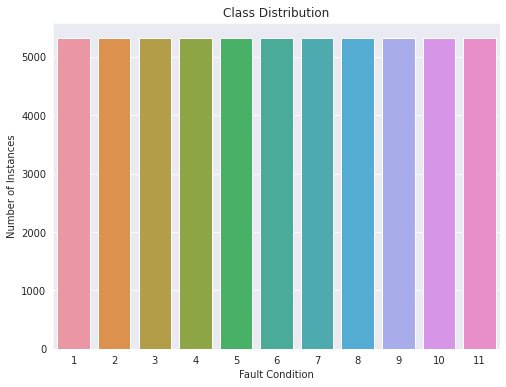

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

for i in [48]:
# Count the number of instances in each fault condition
  class_counts = data[i].value_counts()

  # Plot the class distribution as a bar chart
  plt.figure(figsize=(8,6))
  sns.barplot(x=class_counts.index, y=class_counts.values)
  plt.title("Class Distribution")
  plt.xlabel("Fault Condition")
  plt.ylabel("Number of Instances")
  plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1] - 1  # labels are 1-indexed, make them 0-indexed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow import keras

# Model 1: Base Model
model1 = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(11, activation="softmax")
])
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history1 = model1.fit(X_train, y_train, epochs=50, validation_split=0.2)


# Save model1
model1.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/model1.h5')

# Save history1
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/history1.json', 'w') as f:
    json.dump(history1.history, f)


In [ ]:
# Model 2: Dropout
model2 = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(11, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.2)

model2.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/model2.h5')

import json
with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/history2.json', 'w') as f:
    json.dump(history2.history, f)


In [36]:
# Model 3: Batch Normalization
model3 = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(11, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.2)

model3.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/model3.h5')

import json
with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/history3.json', 'w') as f:
    json.dump(history3.history, f)

Epoch 1/50
1171/1171 [==============================] - 10s 6ms/step - loss: 1.8211 - accuracy: 0.3406 - val_loss: 1.3242 - val_accuracy: 0.5078
Epoch 2/50
1171/1171 [==============================] - 7s 6ms/step - loss: 0.6910 - accuracy: 0.7379 - val_loss: 1.0249 - val_accuracy: 0.6046
Epoch 3/50
1171/1171 [==============================] - 6s 5ms/step - loss: 0.5249 - accuracy: 0.7941 - val_loss: 1.0847 - val_accuracy: 0.5848
Epoch 4/50
1171/1171 [==============================] - 9s 8ms/step - loss: 0.4901 - accuracy: 0.8090 - val_loss: 0.7504 - val_accuracy: 0.8005
Epoch 5/50
1171/1171 [==============================] - 9s 7ms/step - loss: 0.4384 - accuracy: 0.8279 - val_loss: 0.9352 - val_accuracy: 0.6876
Epoch 6/50
1171/1171 [==============================] - 9s 8ms/step - loss: 0.4209 - accuracy: 0.8339 - val_loss: 0.6759 - val_accuracy: 0.7225
Epoch 7/50
1171/1171 [==============================] - 8s 7ms/step - loss: 0.4110 - accuracy: 0.8385 - val_loss: 0.9944 - val_accuracy

In [37]:
# Model 4: Regularization
model4 = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(11, activation="softmax")
])
model4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, epochs=50, validation_split=0.2)


model4.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/model4.h5')

import json
with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/history4.json', 'w') as f:
    json.dump(history4.history, f)

Epoch 1/50
1171/1171 [==============================] - 7s 5ms/step - loss: 2.7702 - accuracy: 0.1170 - val_loss: 2.5556 - val_accuracy: 0.1477
Epoch 2/50
1171/1171 [==============================] - 6s 5ms/step - loss: 2.3995 - accuracy: 0.2281 - val_loss: 2.1004 - val_accuracy: 0.3478
Epoch 3/50
1171/1171 [==============================] - 8s 7ms/step - loss: 1.9762 - accuracy: 0.3948 - val_loss: 1.8812 - val_accuracy: 0.4340
Epoch 4/50
1171/1171 [==============================] - 6s 5ms/step - loss: 1.7905 - accuracy: 0.4596 - val_loss: 1.7525 - val_accuracy: 0.4033
Epoch 5/50
1171/1171 [==============================] - 8s 6ms/step - loss: 1.6914 - accuracy: 0.4888 - val_loss: 1.6349 - val_accuracy: 0.5570
Epoch 6/50
1171/1171 [==============================] - 5s 4ms/step - loss: 1.6395 - accuracy: 0.5091 - val_loss: 1.5766 - val_accuracy: 0.5667
Epoch 7/50
1171/1171 [==============================] - 5s 4ms/step - loss: 1.5735 - accuracy: 0.5299 - val_loss: 1.5267 - val_accuracy:

In [38]:
def graphs(history1, model1):

  import matplotlib.pyplot as plt

  # Plot training & validation accuracy values
  plt.plot(history1.history['accuracy'])
  plt.plot(history1.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history1.history['loss'])
  plt.plot(history1.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


  from sklearn.metrics import confusion_matrix
  import numpy as np
  class_names = np.unique(y)
  # Use the trained model to make predictions on the test set
  y_pred = np.argmax(model1.predict(X_test), axis=-1)

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix as a heatmap
  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.tight_layout()
  plt.show()


  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize

  # Convert the true labels to a one-hot encoded binary matrix
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

  # Use the trained model to make predictions on the test set
  y_scores = model1.predict(X_test)

  # Calculate the ROC curve and AUC for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(np.unique(y_test))):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot the ROC curves
  plt.figure(figsize=(8, 6))
  colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
  for i, color in zip(range(len(np.unique(y_test))), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2,
              label='ROC curve of class {0} (AUC = {1:0.2f})'
              ''.format(i+1, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class')
  plt.legend(loc="lower right")
  plt.show()



  from sklearn.metrics import precision_recall_curve

  # Convert the true labels to a binary matrix
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

  # Use the trained model to make predictions on the test set
  y_scores = model1.predict(X_test)

  # Calculate the precision and recall for each class
  precision = dict()
  recall = dict()
  average_precision = dict()
  for i in range(len(np.unique(y_test))):
      precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
      average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

  # Plot the precision-recall curves
  plt.figure(figsize=(8, 6))
  colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
  for i, color in zip(range(len(np.unique(y_test))), colors):
      plt.plot(recall[i], precision[i], color=color, lw=2,
              label='Precision-recall curve of class {0} (AP = {1:0.2f})'
              ''.format(i+1, average_precision[i]))

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve for multi-class')
  plt.legend(loc="lower right")
  plt.show()


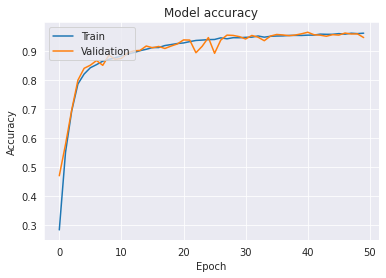

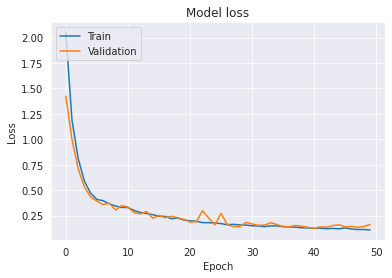

366/366 [==============================] - 1s 2ms/step


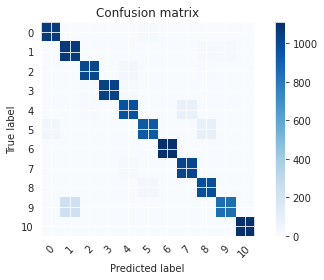

366/366 [==============================] - 1s 3ms/step


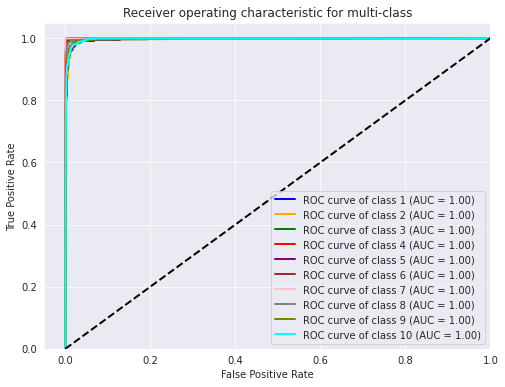

366/366 [==============================] - 1s 3ms/step


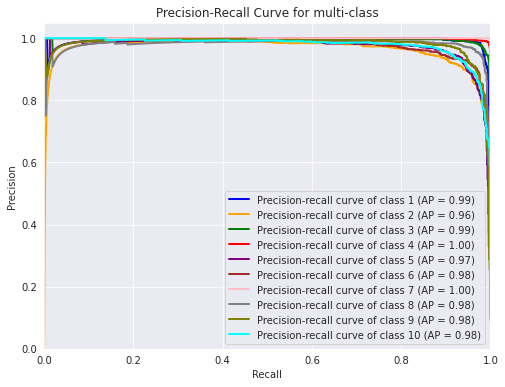

In [39]:
graphs(history1, model1)


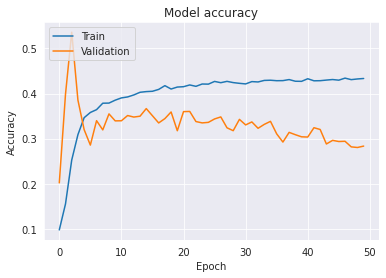

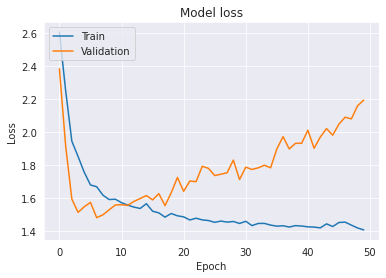

366/366 [==============================] - 1s 2ms/step


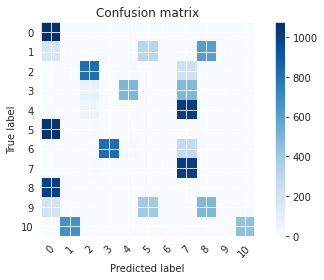

366/366 [==============================] - 1s 2ms/step


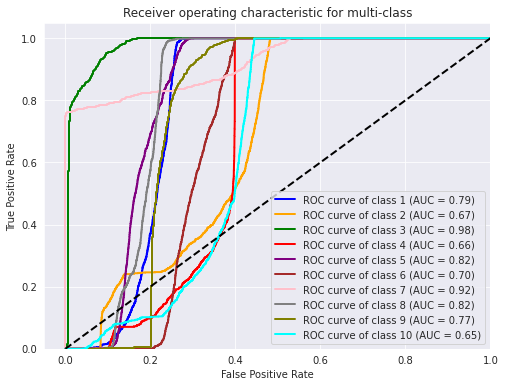

366/366 [==============================] - 1s 2ms/step


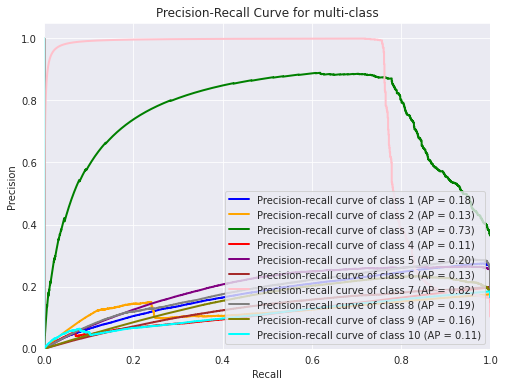

In [40]:
graphs(history2, model2)

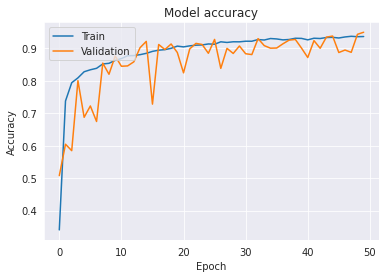

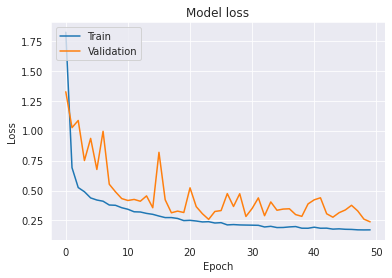

366/366 [==============================] - 1s 2ms/step


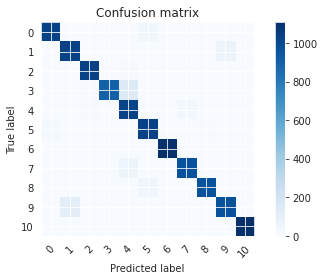

366/366 [==============================] - 1s 2ms/step


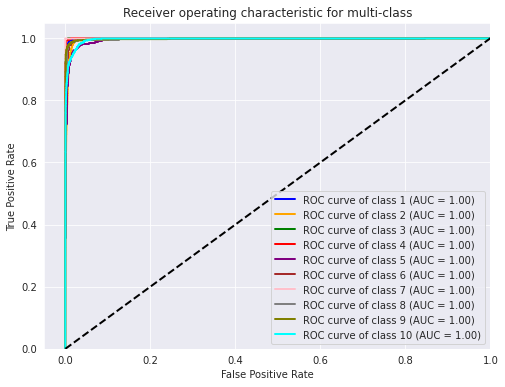

366/366 [==============================] - 1s 2ms/step


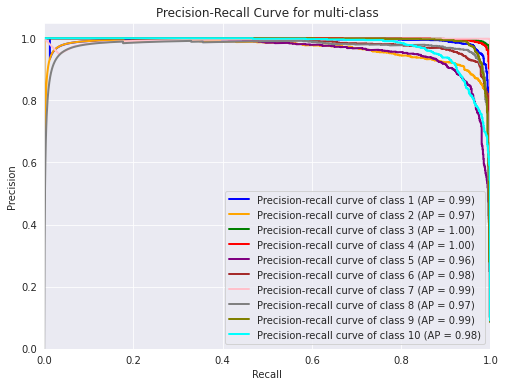

In [41]:
graphs(history3, model3)

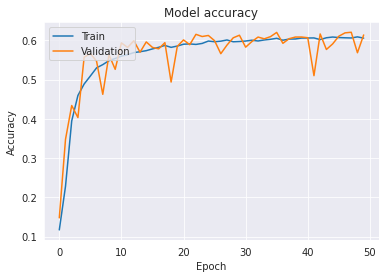

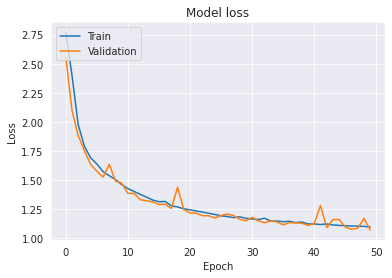

366/366 [==============================] - 2s 6ms/step


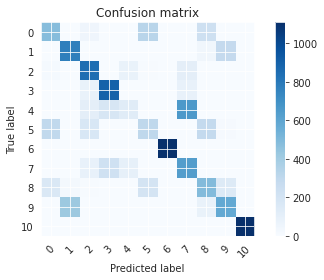

366/366 [==============================] - 1s 2ms/step


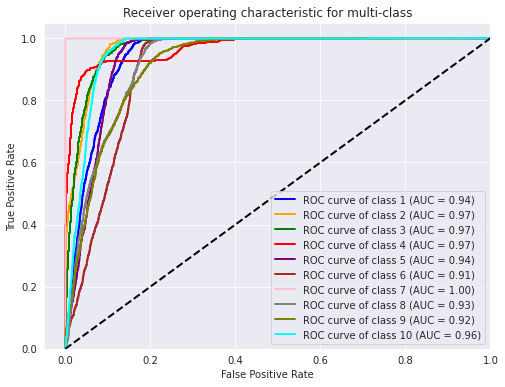

366/366 [==============================] - 1s 2ms/step


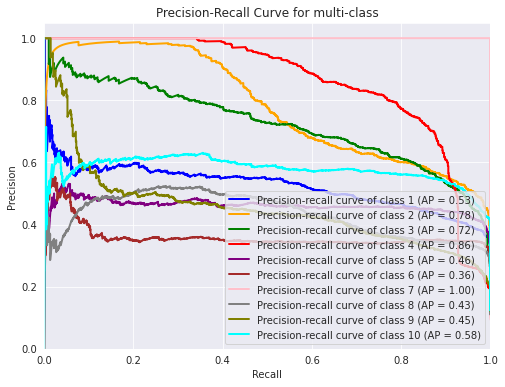

In [42]:
graphs(history4, model4)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

# Hybrid model
model = Sequential()
model.add(Dense(64, input_shape=(48,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/hybrid.h5')

import json
with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/hybrid.json', 'w') as f:
    json.dump(history.history, f)


Epoch 1/50
1171/1171 [==============================] - 10s 7ms/step - loss: 2.9374 - accuracy: 0.1281 - val_loss: 2.2462 - val_accuracy: 0.2786
Epoch 2/50
1171/1171 [==============================] - 7s 6ms/step - loss: 1.7831 - accuracy: 0.3248 - val_loss: 1.5661 - val_accuracy: 0.3420
Epoch 3/50
1171/1171 [==============================] - 7s 6ms/step - loss: 1.4207 - accuracy: 0.4303 - val_loss: 1.0205 - val_accuracy: 0.6443
Epoch 4/50
1171/1171 [==============================] - 7s 6ms/step - loss: 1.1652 - accuracy: 0.5348 - val_loss: 0.8728 - val_accuracy: 0.6801
Epoch 5/50
1171/1171 [==============================] - 7s 6ms/step - loss: 1.0017 - accuracy: 0.6032 - val_loss: 0.9398 - val_accuracy: 0.6315
Epoch 6/50
1171/1171 [==============================] - 7s 6ms/step - loss: 0.9279 - accuracy: 0.6396 - val_loss: 0.6944 - val_accuracy: 0.7815
Epoch 7/50
1171/1171 [==============================] - 7s 6ms/step - loss: 0.8739 - accuracy: 0.6610 - val_loss: 0.5984 - val_accuracy

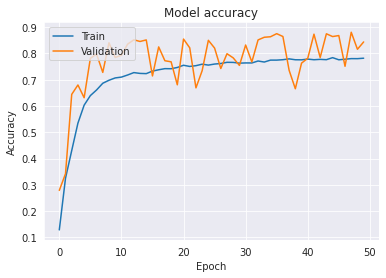

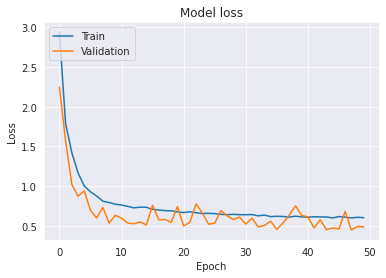

366/366 [==============================] - 1s 2ms/step


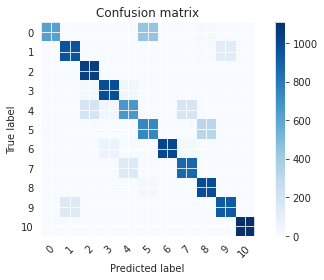

366/366 [==============================] - 1s 2ms/step


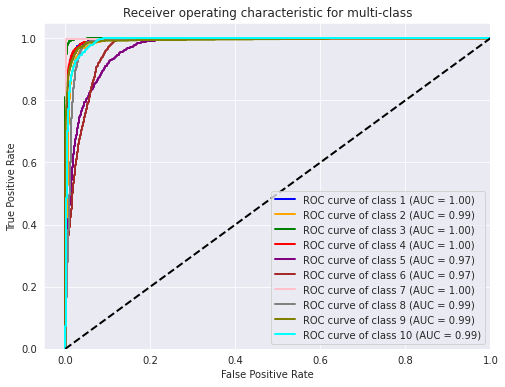

366/366 [==============================] - 1s 2ms/step


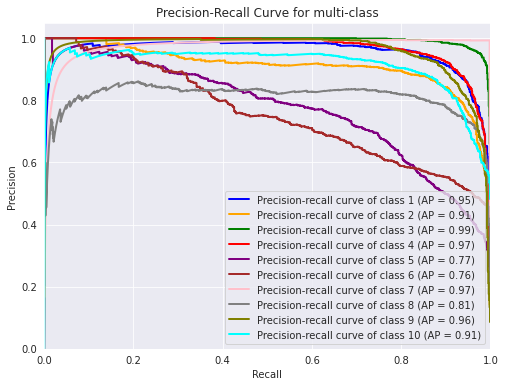

In [44]:
graphs(history, model)

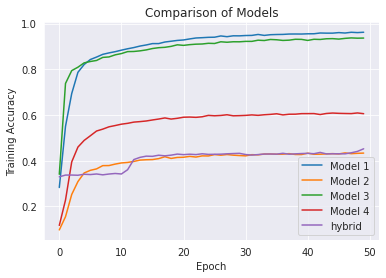

In [74]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# plot the validation accuracy of model1 and model2 on the same graph
ax.plot(history1.history['accuracy'], label='Model 1')
ax.plot(history2.history['accuracy'], label='Model 2')
ax.plot(history3.history['accuracy'], label='Model 3')
ax.plot(history4.history['accuracy'], label='Model 4')
ax.plot(history.history['accuracy'], label='hybrid')

# set the x and y axis labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Accuracy')
ax.set_title('Comparison of Models')

# add the legend to the plot
ax.legend()

# display the plot
plt.show()

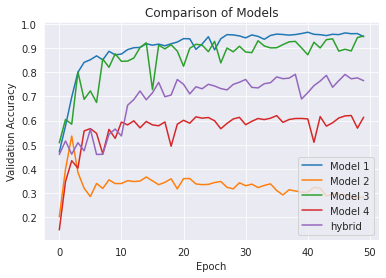

In [73]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# plot the validation accuracy of model1 and model2 on the same graph
ax.plot(history1.history['val_accuracy'], label='Model 1')
ax.plot(history2.history['val_accuracy'], label='Model 2')
ax.plot(history3.history['val_accuracy'], label='Model 3')
ax.plot(history4.history['val_accuracy'], label='Model 4')
ax.plot(history.history['val_accuracy'], label='hybrid')

# set the x and y axis labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Comparison of Models')

# add the legend to the plot
ax.legend()

# display the plot
plt.show()

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graphs(histories, models, title='Model Comparison'):
    # Define plot styles and colors
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    line_styles = ['-', '--', '-.', ':']
    markers = ['o', '.', 's', '*', 'x']

    # Create figure and axes
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axs = axs.flatten()

    # Plot accuracy for each model
    for i, (history, model) in enumerate(zip(histories, models)):
        acc_train = history.history['accuracy']
        acc_val = history.history['val_accuracy']
        epochs = range(1, len(acc_train) + 1)
        axs[0].plot(epochs, acc_train, linestyle=line_styles[i % 4], color=colors[i], marker=markers[i], markersize=4, label=f"Train - Model {i+1}")
        axs[0].plot(epochs, acc_val, linestyle=line_styles[i % 4], color=colors[i], marker=markers[i], markersize=4, label=f"Val - Model {i+1}")
    axs[0].set_title('Model Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot loss for each model
    for i, (history, model) in enumerate(zip(histories, models)):
        loss_train = history.history['loss']
        loss_val = history.history['val_loss']
        epochs = range(1, len(loss_train) + 1)
        axs[1].plot(epochs, loss_train, linestyle=line_styles[i % 4], color=colors[i], marker=markers[i], markersize=4, label=f"Train - Model {i+1}")
        axs[1].plot(epochs, loss_val, linestyle=line_styles[i % 4], color=colors[i], marker=markers[i], markersize=4, label=f"Val - Model {i+1}")
    axs[1].set_title('Model Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    # Plot confusion matrix for each model
    for i, (history, model) in enumerate(zip(histories, models)):
        class_names = np.unique(y)
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        cm = confusion_matrix(y_test, y_pred)
        axs[2].imshow(cm, cmap=plt.cm.Blues)
        axs[2].set_title(f'Model {i+1} Confusion Matrix')
        axs[2].set_xlabel('Predicted label')
        axs[2].set_ylabel('True label')
        tick_marks = np.arange(len(class_names))
        axs[2].set_xticks(tick_marks)
        axs[2].set_xticklabels(class_names, rotation=45)
        axs[2].set_yticks(tick_marks)
        axs[2].set_yticklabels(class_names)
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            axs[2].text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    # Plot ROC


366/366 [==============================] - 1s 2ms/step


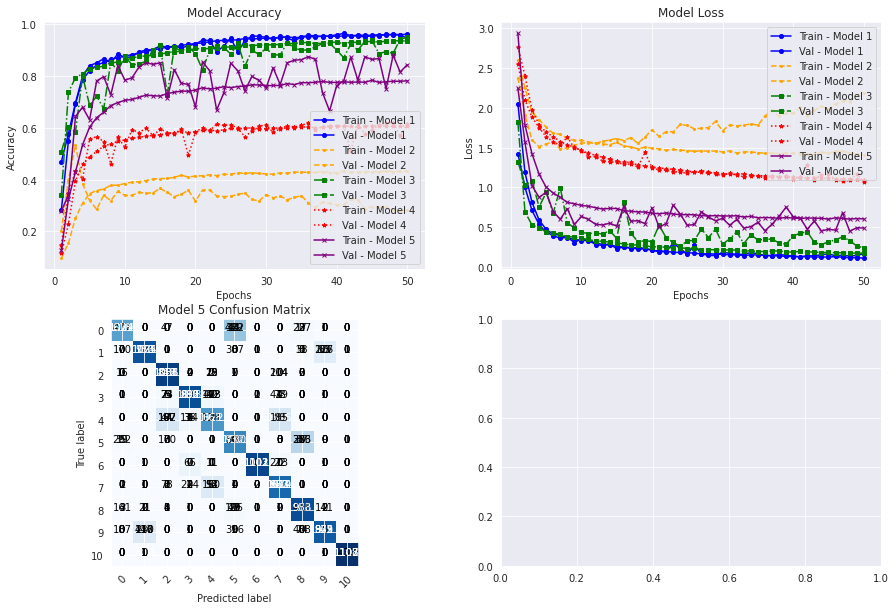

In [49]:
histories = [history1, history2, history3, history4, history]
models = [model1, model2, model3, model4, model]
plot_graphs(histories, models)

## Testing different optimizers

In [64]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

sgd = SGD(learning_rate=0.01, momentum=0.9)
adam = Adam(learning_rate=0.001)
rmsprop = RMSprop(learning_rate=0.001)
adagrad = Adagrad(learning_rate=0.01)
adadelta = Adadelta(learning_rate=0.001)
adamax = Adamax(learning_rate=0.001)
nadam = Nadam(learning_rate=0.001)

In [75]:
results = {}

for optimizer in [sgd, adam, rmsprop, adagrad, adadelta, adamax, nadam]:
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

    model.save('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/Optimizers/'+optimizer.__class__.__name__+'.h5')

    import json
    with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/Optimizers/'+optimizer.__class__.__name__+'.json', 'w') as f:
        json.dump(history.history, f)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results[str(optimizer.__class__.__name__)] = {'loss': test_loss, 'accuracy': test_acc}

print(results)

Epoch 1/50
1171/1171 [==============================] - 9s 6ms/step - loss: 1.8059 - accuracy: 0.3336 - val_loss: 1.1934 - val_accuracy: 0.6583
Epoch 2/50
1171/1171 [==============================] - 9s 8ms/step - loss: 1.7341 - accuracy: 0.3458 - val_loss: 1.2445 - val_accuracy: 0.5752
Epoch 3/50
1171/1171 [==============================] - 5s 5ms/step - loss: 1.6933 - accuracy: 0.3519 - val_loss: 1.3202 - val_accuracy: 0.5065
Epoch 4/50
1171/1171 [==============================] - 7s 6ms/step - loss: 1.6686 - accuracy: 0.3545 - val_loss: 1.1937 - val_accuracy: 0.5837
Epoch 5/50
1171/1171 [==============================] - 6s 5ms/step - loss: 1.6881 - accuracy: 0.3617 - val_loss: 1.3316 - val_accuracy: 0.5673
Epoch 6/50
1171/1171 [==============================] - 6s 5ms/step - loss: 1.6276 - accuracy: 0.3741 - val_loss: 1.1646 - val_accuracy: 0.6300
Epoch 7/50
1171/1171 [==============================] - 6s 5ms/step - loss: 1.6784 - accuracy: 0.3606 - val_loss: 1.1130 - val_accuracy:

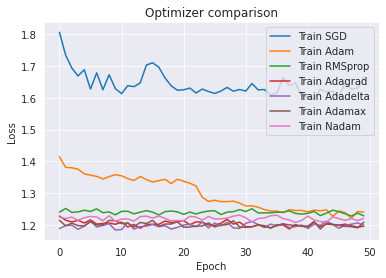

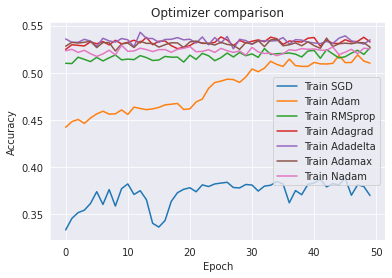

In [79]:
import json
import matplotlib.pyplot as plt

optimizers = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

for optimizer_name in optimizers:
    # Load the history from the JSON file
    with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/Optimizers/'+optimizer_name+'.json', 'r') as f:
        history = json.load(f)

    # Plot the training and validation loss
    plt.plot(history['loss'], label='Train '+optimizer_name)
    # plt.plot(history['val_loss'], label='Val '+optimizer_name)

# Set the plot title, labels, and legend
plt.title('Optimizer comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

for optimizer_name in optimizers:
    # Load the history from the JSON file
    with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/Optimizers/'+optimizer_name+'.json', 'r') as f:
        history = json.load(f)

    # Plot the training and validation accuracy
    plt.plot(history['accuracy'], label='Train '+optimizer_name)
    # plt.plot(history['val_accuracy'], label='Val '+optimizer_name)

# Set the plot title, labels, and legend
plt.title('Optimizer comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


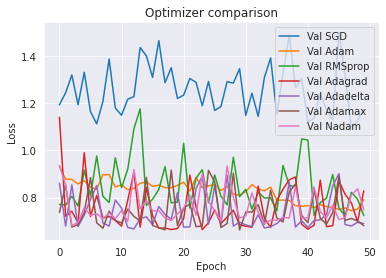

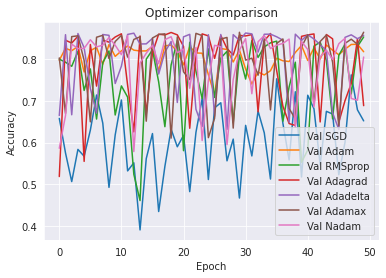

In [80]:
import json
import matplotlib.pyplot as plt

optimizers = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

for optimizer_name in optimizers:
    # Load the history from the JSON file
    with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/Optimizers/'+optimizer_name+'.json', 'r') as f:
        history = json.load(f)

    # Plot the training and validation loss
    # plt.plot(history['loss'], label='Train '+optimizer_name)
    plt.plot(history['val_loss'], label='Val '+optimizer_name)

# Set the plot title, labels, and legend
plt.title('Optimizer comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

for optimizer_name in optimizers:
    # Load the history from the JSON file
    with open('/content/gdrive/My Drive/Colab Notebooks/Saved Models - Grass - P1/Optimizers/'+optimizer_name+'.json', 'r') as f:
        history = json.load(f)

    # Plot the training and validation accuracy
    # plt.plot(history['accuracy'], label='Train '+optimizer_name)
    plt.plot(history['val_accuracy'], label='Val '+optimizer_name)

# Set the plot title, labels, and legend
plt.title('Optimizer comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
